In [130]:
import numpy as np
from numpy import random
import math
from matplotlib import pyplot as plt
from scipy import misc
import scipy

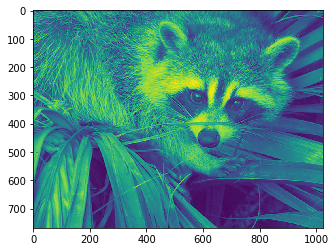

In [2]:
face = misc.face()
data = face[:,:,0] / 255
plt.imshow(data)

In [3]:
data.shape

(768, 1024)

In [4]:
m = 768 # number of data points
n = 1024 # dimensional of data
A = data # data matrix
l = 100 # dimension of low diml space

iterations = 20

In [5]:
def random_svd_rank_k(matrix, k):
    omega = random.randn(n,k)
    Y = A @ omega
    q, r = np.linalg.qr(Y)
    return q @ q.T @ matrix

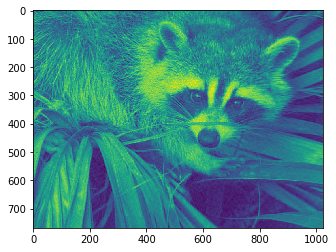

In [6]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
approx = pca.inverse_transform(pca.fit_transform(data))
plt.imshow(approx)

In [7]:
#fig, ax = plt.subplots(1,3, figsize=(15,15))
#ax[0].imshow(data)
#ax[1].imshow(example)
#ax[2].imshow(approx)

In [8]:
def svd_rank_k(matrix, k):
    u, sigma, vh = np.linalg.svd(matrix) #compute full svd
    u = u[:,:k] #keep all rows, take first k columns
    sigma = np.diag(sigma[:k]) #take first k singular values and make diagonal matrix
    vh = vh[:k] #take first k rows, take all columns
    return u @ sigma @ vh #return rank k approximation

In [153]:
def proj(v,u): #projection of v onto u
    return (np.dot(v,u) / np.dot(u,u)) * u


def id_rank_k(matrix, k):
    
    m = matrix #starts out as full matrix
    indices = []
        
    #Greedy determinant maximization process
    for j in range(k):
        col_norms = np.zeros(matrix.shape[1])
        for ind in np.delete(np.arange(matrix.shape[1]), indices): #loop through non-chosen columns
            col_norms[ind] = np.linalg.norm(m[:,ind]) #gets norms of non-chosen columns
        max_norm_index = np.argmax(col_norms) #index of column with greatest l2 norm

        indices.append(max_norm_index) #add the index to a list of indices
        
        #orthogonalize columns with all other indices
        for i in np.delete(np.arange(matrix.shape[1]), indices):   #iterate over all other indices and do g-s step
            for ind in indices:
                m[:,i] = m[:,i] - proj(m[:,i],m[:,ind])
                
    Ak = matrix[:,indices]
    
    print(Ak.shape)
    
    q,r = np.linalg.qr(Ak)
    q = q[:,:k]
    return q @ q.T @ matrix
    

(768, 10)


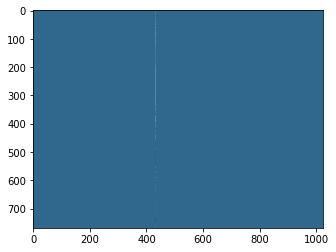

In [154]:
plt.imshow(id_rank_k(data, 10))

In [11]:
def random_id_rank_k(matrix, k, p):
    if(p<=k or p>n):
        print('Invalid p')
        return False
    cols = np.random.choice(matrix.shape[1], replace = False, size = p)
    AS = matrix[:,cols]
    q,r = np.linalg.qr(AS)
    q = q[:,:k]
    return q @ q.T @ matrix

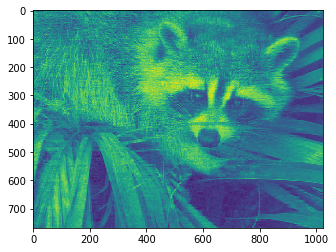

In [12]:
plt.imshow(random_id_rank_k(data, 100, 900))

TypeError: only integer scalar arrays can be converted to a scalar index

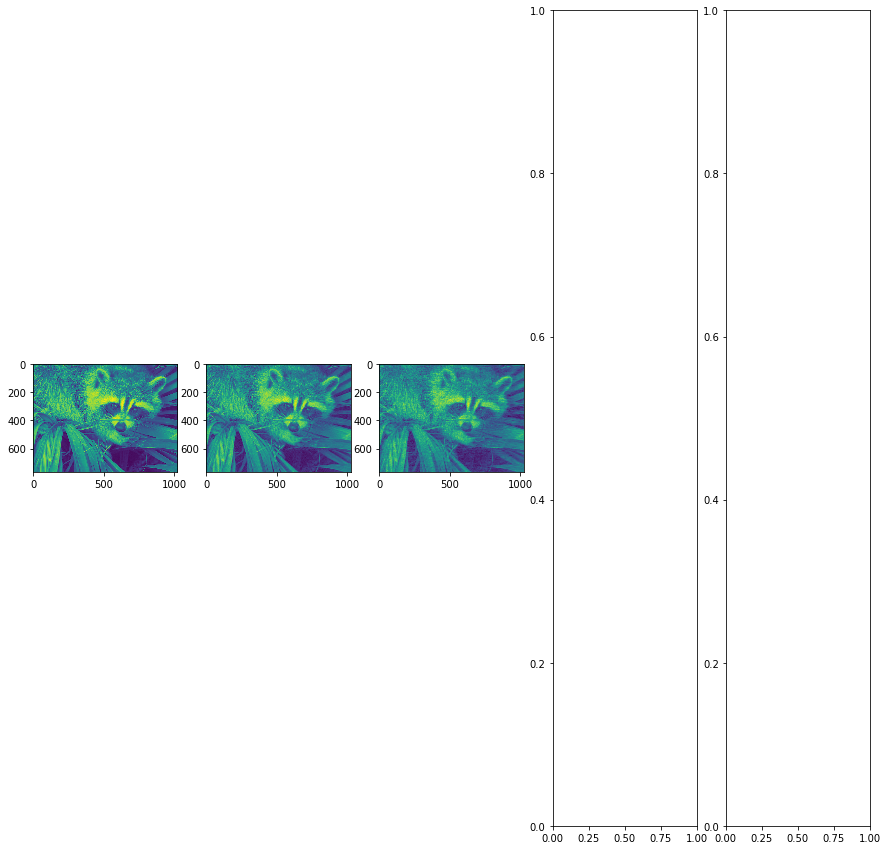

In [13]:
fig, ax = plt.subplots(1,5, figsize=(15,15))
ax[0].imshow(data)
ax[1].imshow(svd_rank_k(data, 100))
ax[2].imshow(random_svd_rank_k(data, 100))
ax[3].imshow(id_rank_k(data, 100))
ax[4].imshow(random_id_rank_k(data, 100, 101))